### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [59]:
#For this step, we're going to do the sum of all the column called "Precio"
a_facturation = pd.DataFrame({
    '# Tienda' : [f'Tienda_{i}' for i in range(1,5)],
    'Ventas' : [sum(tienda1['Precio']),sum(tienda2['Precio']),sum(tienda3['Precio']),sum(tienda4['Precio'])]
})


In [60]:
a_facturation

,# Tienda,Ventas
0,Tienda_1,1.150880e+09
1,Tienda_2,1.116344e+09
2,Tienda_3,1.098020e+09
3,Tienda_4,1.038376e+09


In [4]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

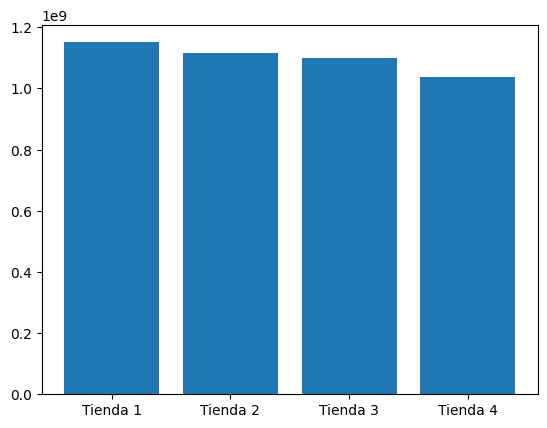

In [5]:
plt.bar(x= a_facturation['# Tienda'], height = a_facturation['Ventas'])

# 2. Ventas por categoría

In [30]:
#First join all the column for can analize the better form

tienda1_f = tienda1.groupby('Categoría del Producto')['Precio'].sum()
tienda2_f = tienda2.groupby('Categoría del Producto')['Precio'].sum()
tienda3_f = tienda3.groupby('Categoría del Producto')['Precio'].sum()
tienda4_f = tienda4.groupby('Categoría del Producto')['Precio'].sum()

In [43]:
tienda_ventas_final = pd.merge(tienda1_f, tienda2_f, on=['Categoría del Producto'], suffixes=('_1', '_2'))
tienda_ventas_final = pd.merge(tienda_ventas_final, tienda3_f, on=['Categoría del Producto'], suffixes=('_3','_3'))
tienda_ventas_final = pd.merge(tienda_ventas_final, tienda4_f, on=['Categoría del Producto'], suffixes=('_3','_4'))

In [44]:
tienda_ventas_final

,Precio_1,Precio_2,Precio_3,Precio_4
Categoría del Producto,,,,
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
Libros,8784900.0,10091200.0,9498700.0,9321300.0
Muebles,187633700.0,176426300.0,201072100.0,192528900.0


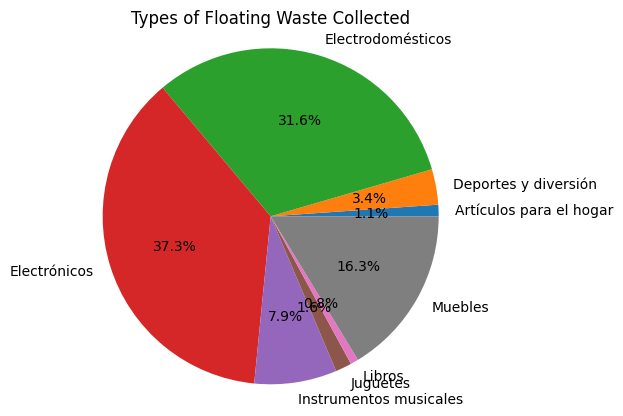

In [64]:
import matplotlib.pyplot as plt

# Access the values of the Series directly using .values
#In this case we're goint to use the DF that we crate first, before to join all the df
#Shop 1
plt.pie(tienda1_f.values, labels=tienda1_f.index, autopct='%1.1f%%')

plt.title('Types of Floating Waste Collected')
plt.axis('equal')
plt.show()

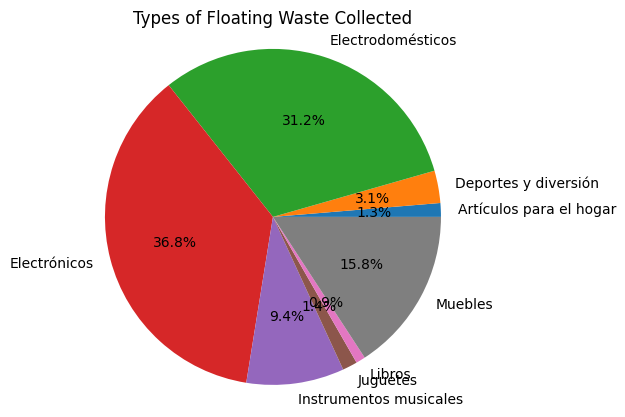

In [65]:
#Shop 2
plt.pie(tienda2_f.values, labels=tienda2_f.index, autopct='%1.1f%%')

plt.title('Types of Floating Waste Collected')
plt.axis('equal')
plt.show()

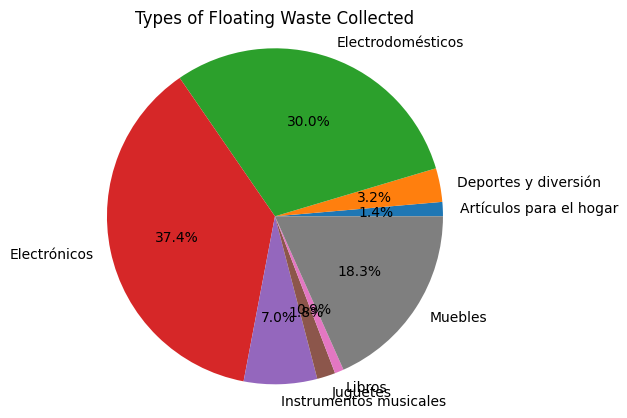

In [66]:
#Shop 1
plt.pie(tienda3_f.values, labels=tienda3_f.index, autopct='%1.1f%%')

plt.title('Types of Floating Waste Collected')
plt.axis('equal')
plt.show()

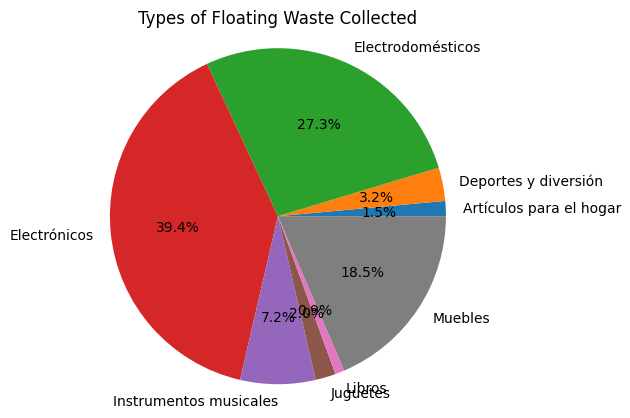

In [67]:
#Shop 1
plt.pie(tienda4_f.values, labels=tienda4_f.index, autopct='%1.1f%%')

plt.title('Types of Floating Waste Collected')
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [81]:
average_shop = pd.DataFrame({
    '#Shop' : [f'Tienda{i}' for i in range(1,5)] ,

    #With the function globals(), we can call different element of differents df, this is and example, in where we did the mean of each column called Calificacion, in the differents df

    'Average': [globals()[f'tienda{j}']['Calificación'].mean() for j in range(1, 5)]
})

In [84]:
average_shop.round(2)

,#Shop,Average
0,Tienda1,3.98
1,Tienda2,4.04
2,Tienda3,4.05
3,Tienda4,4.00


# 4. Productos más y menos vendidos

In [8]:
#In this case, we are use a function where fisrt separate for category and the same time count how many element content for category

In [9]:
tienda_p1 = tienda1.groupby('Producto')['Precio'].sum()
tienda_p2 = tienda2.groupby('Producto')['Precio'].sum()
tienda_p3 = tienda3.groupby('Producto')['Precio'].sum()
tienda_p4 = tienda4.groupby('Producto')['Precio'].sum()

In [10]:
final_p = pd.merge(tienda_p1,tienda_p2, on='Producto', suffixes=('_1','_2'))
final_p = pd.merge(final_p,tienda_p3, on='Producto', suffixes=('_x','_3'))
final_p = pd.merge(final_p,tienda_p4, on='Producto', suffixes=('_x','_4'))

In [11]:
final_p

,Precio_1,Precio_2,Precio_x,Precio_4
Producto,,,,
Ajedrez de madera,1430600.0,1287700.0,1355300.0,1075500.0
Armario,29462300.0,26174900.0,24187200.0,16421400.0
Asistente virtual,8058000.0,7929500.0,8013300.0,10467300.0
Auriculares,5043700.0,3569600.0,3959400.0,3943600.0
Auriculares con micrófono,4730800.0,5644300.0,5970500.0,6402900.0
Balón de baloncesto,2749800.0,2091300.0,2478100.0,2439800.0
Balón de voleibol,2112200.0,2289600.0,2333800.0,2364200.0
Batería,37693900.0,46175300.0,29369200.0,34567900.0
Bicicleta,27444600.0,22958300.0,24654800.0,21429800.0


In [13]:
#In these graphics, we're going to print each shop and the difference between each shop

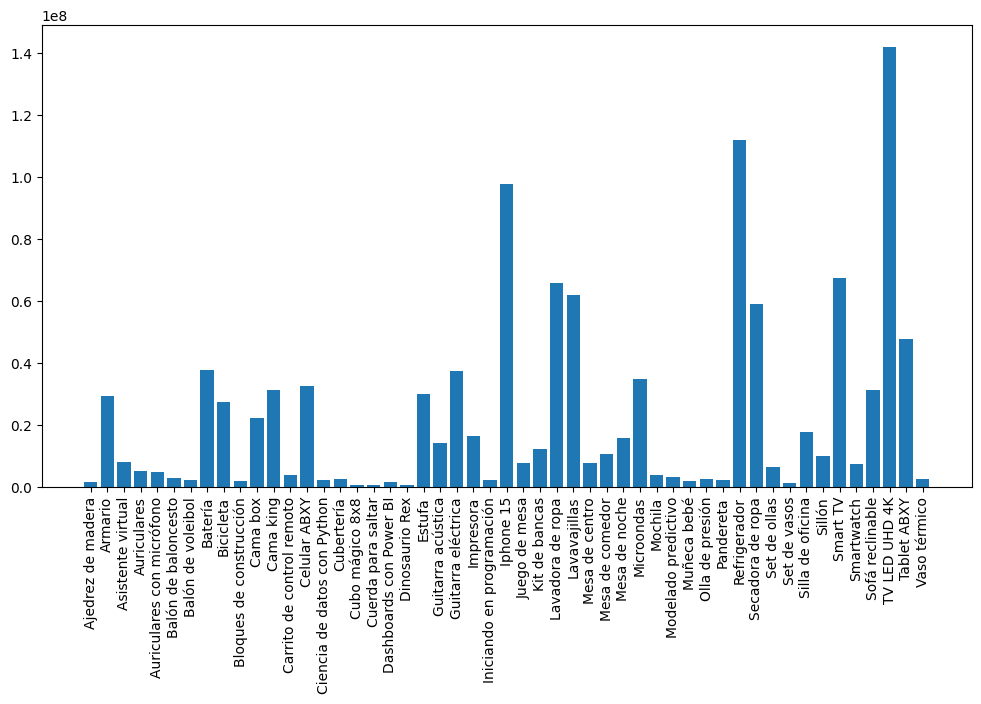

In [25]:
#With this function, we can change the size of our graphic
plt.figure(figsize=(12, 6))

plt.bar(x = final_p.index , height= final_p['Precio_1'])

#And with this, we can move 90° the values in X
plt.xticks(rotation=90)
plt.show()

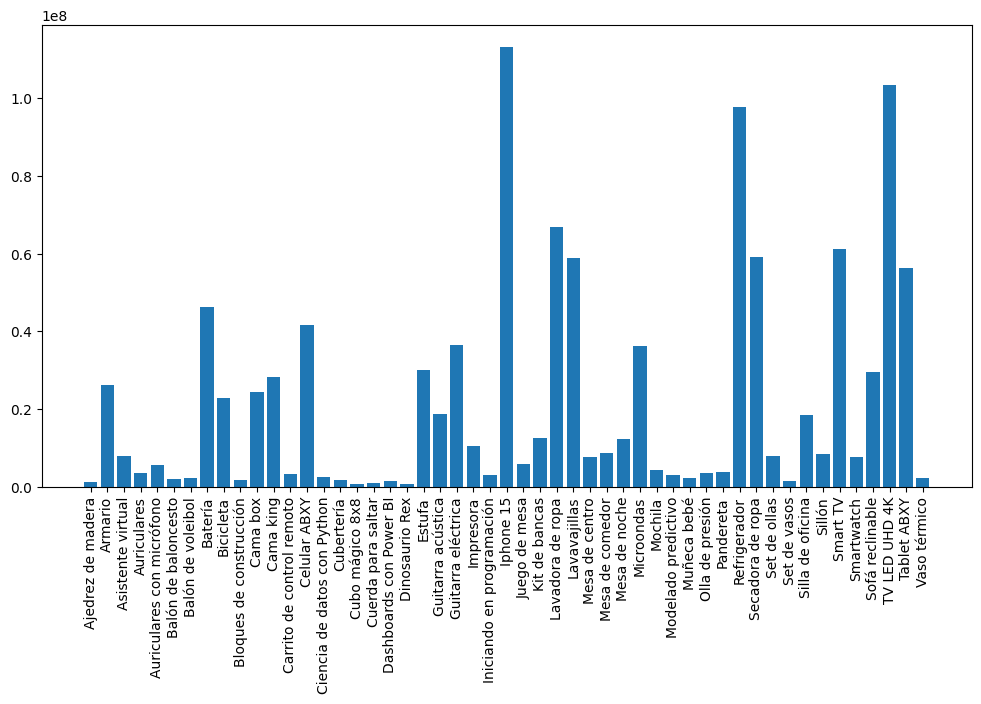

In [21]:
#With this function, we can change the size of our graphic
plt.figure(figsize=(12, 6))

plt.bar(x = final_p.index , height= final_p['Precio_2'])

#And with this, we can move 90° the values in X
plt.xticks(rotation=90)
plt.show()

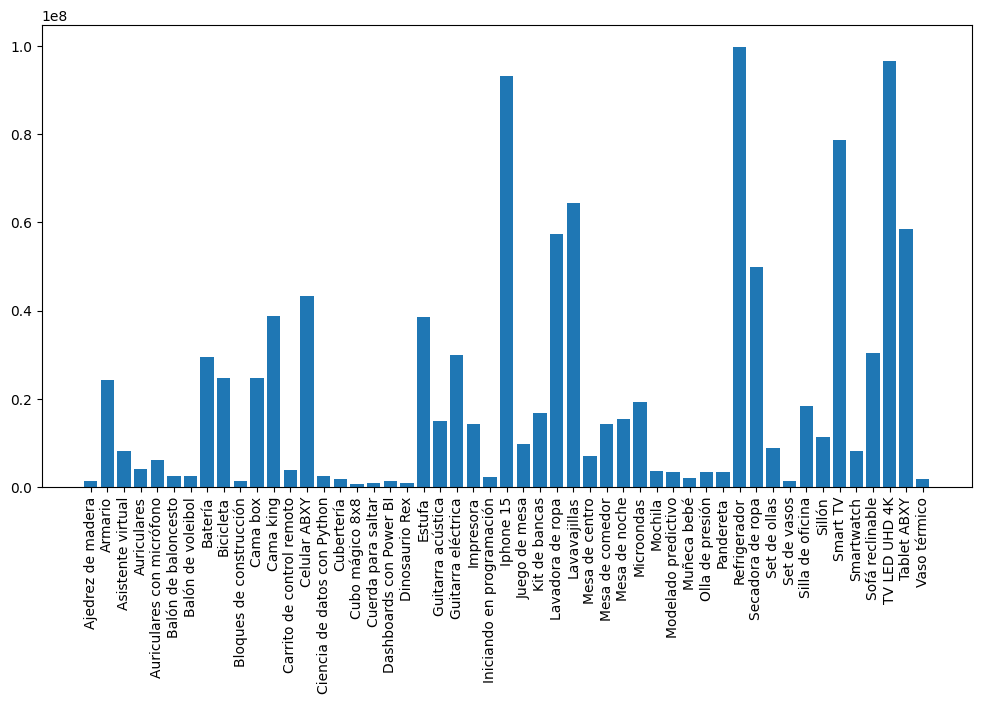

In [22]:
#With this function, we can change the size of our graphic
plt.figure(figsize=(12, 6))

plt.bar(x = final_p.index , height= final_p['Precio_x'])

#And with this, we can move 90° the values in X
plt.xticks(rotation=90)
plt.show()

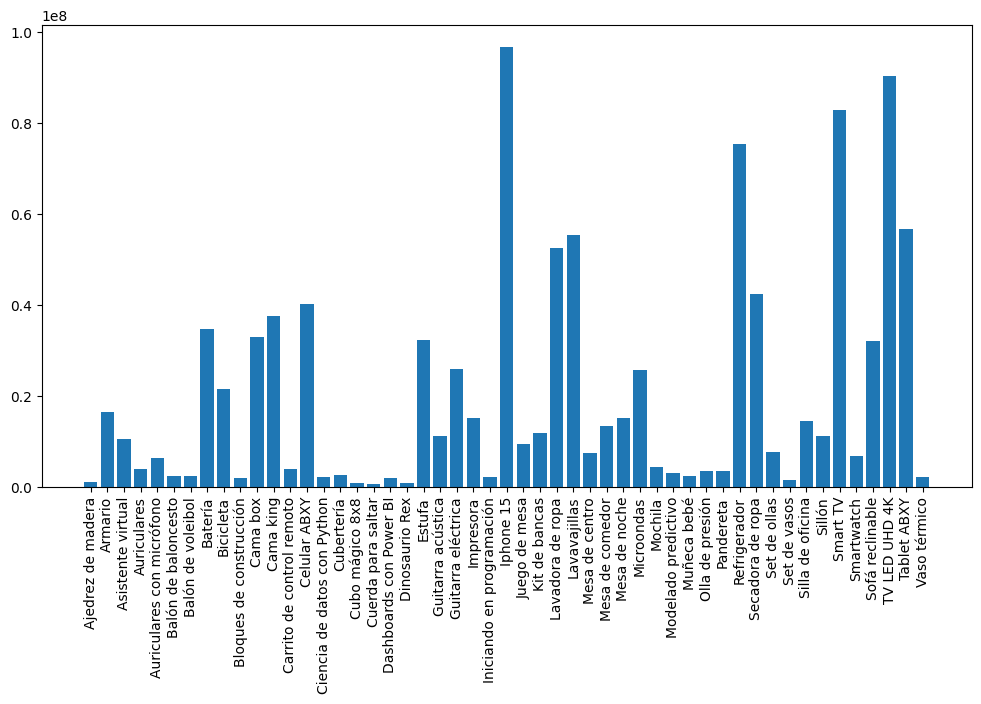

In [23]:
#With this function, we can change the size of our graphic
plt.figure(figsize=(12, 6))

plt.bar(x = final_p.index , height= final_p['Precio_4'])

#And with this, we can move 90° the values in X
plt.xticks(rotation=90)
plt.show()

# 5. Envío promedio por tienda

In [89]:
#In this part we're going to do the average for all the cost to send

average_per_shipment = pd.DataFrame({
    '#Shop' : [f'Tienda{i}' for i in range(1,5)],
    'A_Per_Shipment' : [globals() [f'tienda{j}']['Costo de envío'].mean() for j in range(1,5)]
})

In [91]:
average_per_shipment.round(2)

,#Shop,A_Per_Shipment
0,Tienda1,26018.61
1,Tienda2,25216.24
2,Tienda3,24805.68
3,Tienda4,23459.46


# 6. Analisis

Despues de realizae todo el analisis, podemos decir que la mejor opcion es vender la tienda #4, aunque tiene buena calificacion en cuando la atencion de clientes, los demas factores como ventas por producto o por departamento, eso hace que su rendimiento no sea de los mejores, aunque la diferencia no es muy grande entre  el resto de las tiendas, pero esta es la mejor opcion para poder vender.